# File handling tools

In [2]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [70]:
import os
import sys
sys.path.append("../")
import py.fileHandling as fh
from py.config import cfg
import py.logs as logs
import py.vidRead as vr
import py.vidMorph as vm
LOGGERDEFINED = logs.openLog('fileHandling.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

In [56]:
import cv2 as cv
import numpy as np
import imutils
import random as rng

In [4]:
t = fh.Test(os.path.join(cfg.path.vids, '210616 mineralS LapRDT', 'M4S_3.50T_p4'))

In [6]:
t.prnt()

Droplet: {'base': 'mineral oil', 'rheModifier': 'fumed silica', 'surfactant': 'Span 20', 'rheWt': 4.0}
Matrix: {'base': 'water', 'rheModifier': 'Laponite RD', 'surfactant': 'Tween 80', 'rheWt': 3.5}
Profile:     mode  gap strain rate freq direction time
0   stdy  500    n/a    1  n/a        cw    8
1   stdy  500    n/a    2  n/a       acw    6
2   stdy  500    n/a    3  n/a        cw    4
3   stdy  500    n/a    4  n/a       acw    3
4   stdy  500    n/a    5  n/a        cw    2
5   stdy  500    n/a    6  n/a       acw    2
6   stdy  500    n/a    8  n/a        cw    2
7   stdy  500    n/a   10  n/a       acw    2
8   stdy  500    n/a   12  n/a        cw    2
9   stdy  500    n/a   16  n/a       acw    1
10  stdy  500    n/a   20  n/a        cw    1
11  stdy  500    n/a   30  n/a       acw    1
12  stdy  500    n/a   40  n/a        cw    1
13  stdy  500    n/a   50  n/a       acw    1
Videos: ['Basler acA2040-90uc (21726010)_20210616_141619152.mp4', 'Basler acA2040-90uc (21726010)_2021

[((854.5941772460938, 425.4931640625), (140.6873779296875, 183.93849182128906), 170.76902770996094), ((817.052734375, 234.77627563476562), (105.4149169921875, 122.08100891113281), 168.61122131347656)]


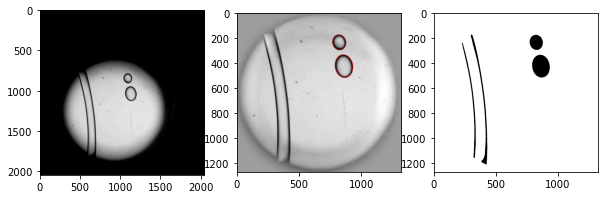

In [85]:
frame, removed, interfaces = vr.readFrames(t.videos[2])

In [84]:
interfaces.shape

(1274, 1319)

[[[859.5      451.5       64.3     ]
  [820.5      232.5       58.600002]]]


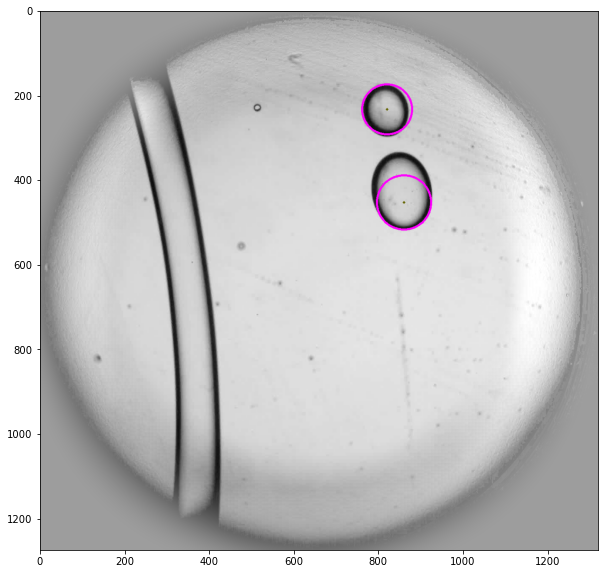

In [83]:
circles = cv.HoughCircles(interfaces, cv.HOUGH_GRADIENT, 3, 100, minRadius=1)
print(circles)
removed2 = removed.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv.circle(removed2, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv.circle(removed2, center, radius, (255, 0, 255), 3)
        
vr.imshow(removed2)

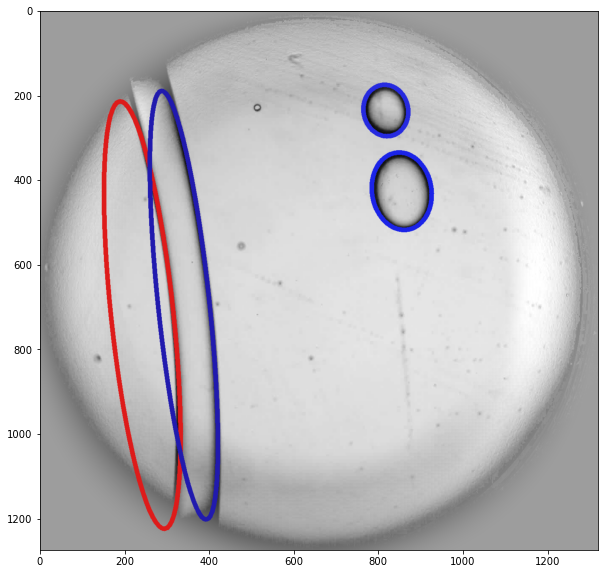

In [64]:
_, contours, hierarchy = cv.findContours(interfaces, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
r2 = removed.copy()
for i in range(len(contours)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
#     cv.drawContours(r2, contours, i, color, 2, cv.LINE_8, hierarchy, 0)
    e = cv.fitEllipse(contours[i])
    cv.ellipse(r2, e, color, 10)
vr.imshow(r2)

[((854.5941772460938, 425.4931640625),
  (140.6873779296875, 183.93849182128906),
  170.76902770996094),
 ((817.052734375, 234.77627563476562),
  (105.4149169921875, 122.08100891113281),
  168.61122131347656)]

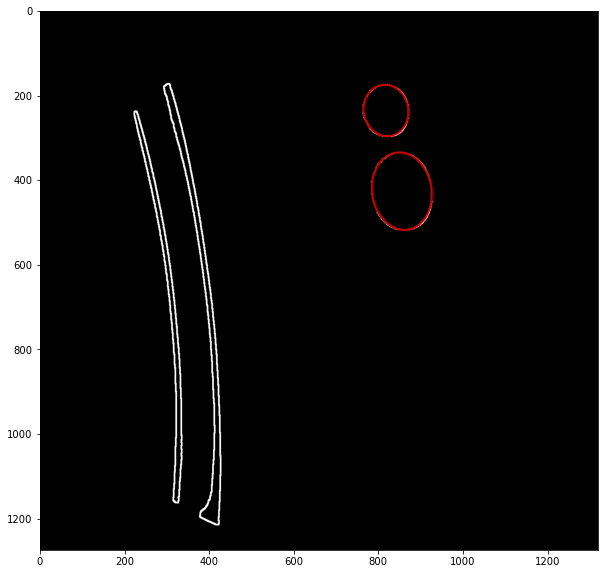

In [82]:
vm.detectEllipses(interfaces, diag=True)

[<KeyPoint 000001C9668D3750>, <KeyPoint 000001C9668D3450>]


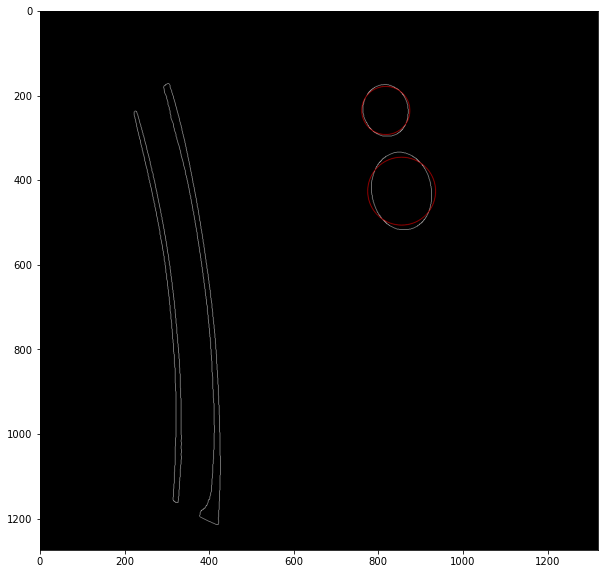

In [46]:
# Set our filtering parameters
# Initialize parameter settiing using cv2.SimpleBlobDetector
edges = imutils.auto_canny(interfaces)
params = cv.SimpleBlobDetector_Params()
  
# Set Area filtering parameters
params.filterByArea = True
params.minArea =50
params.maxArea=100000
  
# Set Circularity filtering parameters
params.filterByCircularity = True
params.minCircularity = 0.5
  
# Set Convexity filtering parameters
params.filterByConvexity = True
params.minConvexity = 0.2
      
# Set inertia filtering parameters
params.filterByInertia = False
params.minInertiaRatio = 0.01
  
# Create a detector with the parameters
detector = cv.SimpleBlobDetector_create(params)
      
# Detect blobs
keypoints = detector.detect(edges)
print(keypoints)
  
# Draw blobs on our image as red circles
blank = np.zeros((1, 1)) 
blobs = cv.drawKeypoints(edges, keypoints, blank, (0, 0, 255),
                          cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
vr.imshow(blobs)

In [45]:
for k in keypoints:
    print(k.pt)
    print(k.size)
    print(k.angle)
    print(k.response)
    print(k.octave)
    print(k.class_id)

(854.3663330078125, 425.2953186035156)
160.48641967773438
-1.0
0.0
0
-1
(816.8472900390625, 234.6043243408203)
113.77861022949219
-1.0
0.0
0
-1
